## Metric For Machine Learning

In [1]:
"""
Linear Regression: 实现了回归，其中包括线性函数的定义，为什么要用线性函数，loss的意义，梯度下降的意义，stochastic gradient descent
Use Boston house price dataset.
北京2020年房价的数据集，为什么我没有用北京房价的数据集呢？
Boston: room size, subway, highway, crime rate 有一个比较明显的关系，所以就观察关系比较容易
北京的房价：！远近，！房况 ==》 学区！！！！ => 非常贵 海淀区
Harder than deep learning:
    1. compiler
    2. programming language & automata
    3. computer graphic
    4. complexity system
    5. computing complexity
    6. operating system
"""


from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
from linear_regression_course import train
import pickle


dataset = load_boston()
data = dataset['data']
target = dataset['target']
columns = dataset['feature_names']

dataframe = pd.DataFrame(data)
dataframe.columns = columns
dataframe['price'] = target

# print(dataframe.corr()) # show the correlation of dataframe variables
# correlation => 如果一个值的增大，会引起另外一个值一定增大，而且是定比例增大 相关系数就越接近于1
# correlation => 0 就是两者之间没有任何关系
# correlation => -1 一个值增大 另外一个值一定减小 而且减小是成相等比例的

# sns.heatmap(dataframe.corr())
# plt.show()

# RM：小区平均的卧室个数
# LSTAT: 低收入人群在周围的比例

rm = dataframe['RM']
lstat = dataframe['LSTAT']
price = dataframe['price']
greater_then_most = np.percentile(price, 66)
dataframe['expensive'] = dataframe['price'].apply(lambda p: int(p > greater_then_most))
target = dataframe['expensive']

print(dataframe[:20])


def sigmoid(x):
    return 1 / (1 + np.exp(-x))


def model(x, w, b):
    return sigmoid(np.dot(x, w.T) + b)


def loss(yhat, y):
    return -np.sum(y*np.log(yhat) + (1 - y)*np.log(1 - yhat))


def partial_w(x, y, yhat):
    return np.array([np.sum((yhat - y) * x[0]), np.sum((yhat - y) * x[1])])


def partial_b(x, y, yhat):
    return np.sum((yhat - y))


model, w, b, losses = train(model, target, loss, partial_w, partial_b)

       CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD    TAX  \
0   0.00632  18.0   2.31   0.0  0.538  6.575   65.2  4.0900  1.0  296.0   
1   0.02731   0.0   7.07   0.0  0.469  6.421   78.9  4.9671  2.0  242.0   
2   0.02729   0.0   7.07   0.0  0.469  7.185   61.1  4.9671  2.0  242.0   
3   0.03237   0.0   2.18   0.0  0.458  6.998   45.8  6.0622  3.0  222.0   
4   0.06905   0.0   2.18   0.0  0.458  7.147   54.2  6.0622  3.0  222.0   
5   0.02985   0.0   2.18   0.0  0.458  6.430   58.7  6.0622  3.0  222.0   
6   0.08829  12.5   7.87   0.0  0.524  6.012   66.6  5.5605  5.0  311.0   
7   0.14455  12.5   7.87   0.0  0.524  6.172   96.1  5.9505  5.0  311.0   
8   0.21124  12.5   7.87   0.0  0.524  5.631  100.0  6.0821  5.0  311.0   
9   0.17004  12.5   7.87   0.0  0.524  6.004   85.9  6.5921  5.0  311.0   
10  0.22489  12.5   7.87   0.0  0.524  6.377   94.3  6.3467  5.0  311.0   
11  0.11747  12.5   7.87   0.0  0.524  6.009   82.9  6.2267  5.0  311.0   
12  0.09378  12.5   7.87 

Epoch: 23 Batch: 300, loss: 0.08481319487731195
Epoch: 23 Batch: 400, loss: 0.6559204116182972
Epoch: 23 Batch: 500, loss: 1.0188856777416477
Epoch: 24 Batch: 0, loss: 0.7451943506699132
Epoch: 24 Batch: 100, loss: 0.08393137442095533
Epoch: 24 Batch: 200, loss: 0.09354505293110424
Epoch: 24 Batch: 300, loss: 0.15414070266618185
Epoch: 24 Batch: 400, loss: 0.02074789060500051
Epoch: 24 Batch: 500, loss: 0.9680075891226287
Epoch: 25 Batch: 0, loss: 0.3432928318459553
Epoch: 25 Batch: 100, loss: 1.4445875152359073
Epoch: 25 Batch: 200, loss: 0.23359415239381398
Epoch: 25 Batch: 300, loss: 0.6932307956482775
Epoch: 25 Batch: 400, loss: 0.12760640997210898
Epoch: 25 Batch: 500, loss: 0.24464230251399288
Epoch: 26 Batch: 0, loss: 0.30325233389416756
Epoch: 26 Batch: 100, loss: 0.1800223716650605
Epoch: 26 Batch: 200, loss: 0.6025343460664814
Epoch: 26 Batch: 300, loss: 0.27510692066058373
Epoch: 26 Batch: 400, loss: 1.6311290778969851
Epoch: 26 Batch: 500, loss: 0.21143680793515365
Epoch: 2

Epoch: 55 Batch: 300, loss: 0.001498892333924483
Epoch: 55 Batch: 400, loss: 0.018937514212736085
Epoch: 55 Batch: 500, loss: 0.8064896788338125
Epoch: 56 Batch: 0, loss: 0.3101263460664965
Epoch: 56 Batch: 100, loss: 0.03007202496533159
Epoch: 56 Batch: 200, loss: 0.2557050223378197
Epoch: 56 Batch: 300, loss: 0.07510274393437927
Epoch: 56 Batch: 400, loss: 0.0017844280567933652
Epoch: 56 Batch: 500, loss: 1.0752580484531555
Epoch: 57 Batch: 0, loss: 0.007546154598895173
Epoch: 57 Batch: 100, loss: 0.007460251241314447
Epoch: 57 Batch: 200, loss: 0.5187829089707059
Epoch: 57 Batch: 300, loss: 2.034949595404852
Epoch: 57 Batch: 400, loss: 0.3190187666843871
Epoch: 57 Batch: 500, loss: 0.3181826377046034
Epoch: 58 Batch: 0, loss: 0.08803793518303288
Epoch: 58 Batch: 100, loss: 0.04038209519805335
Epoch: 58 Batch: 200, loss: 0.012543375046399215
Epoch: 58 Batch: 300, loss: 0.13024346373977688
Epoch: 58 Batch: 400, loss: 0.04630147953804212
Epoch: 58 Batch: 500, loss: 0.8216705577421665
E

Epoch: 87 Batch: 300, loss: 0.5935190849270788
Epoch: 87 Batch: 400, loss: 0.10556049620702757
Epoch: 87 Batch: 500, loss: 0.00568288084100524
Epoch: 88 Batch: 0, loss: 0.12792586918310622
Epoch: 88 Batch: 100, loss: 0.3795170118375526
Epoch: 88 Batch: 200, loss: 0.43945632579680727
Epoch: 88 Batch: 300, loss: 3.846248887878397e-05
Epoch: 88 Batch: 400, loss: 0.10680395753567978
Epoch: 88 Batch: 500, loss: 0.7315493485875699
Epoch: 89 Batch: 0, loss: 0.10656745508900135
Epoch: 89 Batch: 100, loss: 0.18433404523894908
Epoch: 89 Batch: 200, loss: 0.1444779343032526
Epoch: 89 Batch: 300, loss: 0.09479506961015435
Epoch: 89 Batch: 400, loss: 0.4377269126556663
Epoch: 89 Batch: 500, loss: 0.883171546108192
Epoch: 90 Batch: 0, loss: 0.4579019917758165
Epoch: 90 Batch: 100, loss: 0.32346654220194887
Epoch: 90 Batch: 200, loss: 0.08266284618541826
Epoch: 90 Batch: 300, loss: 0.3971377044405933
Epoch: 90 Batch: 400, loss: 0.9934478510106487
Epoch: 90 Batch: 500, loss: 0.30576164651244064
Epoch:

Epoch: 118 Batch: 200, loss: 0.4010115776777767
Epoch: 118 Batch: 300, loss: 0.7028859088204736
Epoch: 118 Batch: 400, loss: 0.24075951837825138
Epoch: 118 Batch: 500, loss: 0.022191317376890833
Epoch: 119 Batch: 0, loss: 1.583676782444218
Epoch: 119 Batch: 100, loss: 0.00042303315571495635
Epoch: 119 Batch: 200, loss: 0.08045688887561125
Epoch: 119 Batch: 300, loss: 0.11742951673224467
Epoch: 119 Batch: 400, loss: 0.024708916720929466
Epoch: 119 Batch: 500, loss: 0.04259623953693813
Epoch: 120 Batch: 0, loss: 0.11217268535364511
Epoch: 120 Batch: 100, loss: 0.033063506921872814
Epoch: 120 Batch: 200, loss: 0.6699537387150392
Epoch: 120 Batch: 300, loss: 0.003972419506914452
Epoch: 120 Batch: 400, loss: 2.1580140716425587
Epoch: 120 Batch: 500, loss: 0.2212782674789385
Epoch: 121 Batch: 0, loss: 0.14858474427642618
Epoch: 121 Batch: 100, loss: 0.03738039869816903
Epoch: 121 Batch: 200, loss: 0.5043122988021512
Epoch: 121 Batch: 300, loss: 0.001071382447350763
Epoch: 121 Batch: 400, los

Epoch: 150 Batch: 200, loss: 2.4275403036701633
Epoch: 150 Batch: 300, loss: 1.9403602464811296
Epoch: 150 Batch: 400, loss: 0.2317259901742204
Epoch: 150 Batch: 500, loss: 0.09101622460346205
Epoch: 151 Batch: 0, loss: 0.5715687005783104
Epoch: 151 Batch: 100, loss: 2.0936712277945326
Epoch: 151 Batch: 200, loss: 0.0009520550718350883
Epoch: 151 Batch: 300, loss: 0.13598841322996674
Epoch: 151 Batch: 400, loss: 0.007427498430291169
Epoch: 151 Batch: 500, loss: 1.02196313603075
Epoch: 152 Batch: 0, loss: 0.28747892724303903
Epoch: 152 Batch: 100, loss: 0.3163649874063253
Epoch: 152 Batch: 200, loss: 0.0013702943218120434
Epoch: 152 Batch: 300, loss: 0.41023545355214347
Epoch: 152 Batch: 400, loss: 0.230544341287305
Epoch: 152 Batch: 500, loss: 0.038273689828419444
Epoch: 153 Batch: 0, loss: 0.055429991284628284
Epoch: 153 Batch: 100, loss: 0.00017963831323251943
Epoch: 153 Batch: 200, loss: 0.015133753608091162
Epoch: 153 Batch: 300, loss: 0.10503405921124541
Epoch: 153 Batch: 400, los

Epoch: 183 Batch: 200, loss: 0.2787535311794321
Epoch: 183 Batch: 300, loss: 0.3449031089255375
Epoch: 183 Batch: 400, loss: 0.013279747544024416
Epoch: 183 Batch: 500, loss: 0.012164131335510975
Epoch: 184 Batch: 0, loss: 0.3654014557531331
Epoch: 184 Batch: 100, loss: 0.9575360609194581
Epoch: 184 Batch: 200, loss: 0.28221577276570803
Epoch: 184 Batch: 300, loss: 0.48336030829854826
Epoch: 184 Batch: 400, loss: 1.02577815545914
Epoch: 184 Batch: 500, loss: 0.002090633552164964
Epoch: 185 Batch: 0, loss: 0.10045644586035474
Epoch: 185 Batch: 100, loss: 0.03464699575405779
Epoch: 185 Batch: 200, loss: 0.3768985187933983
Epoch: 185 Batch: 300, loss: 0.19819080990543378
Epoch: 185 Batch: 400, loss: 0.3585186604879009
Epoch: 185 Batch: 500, loss: 0.0036082252606026385
Epoch: 186 Batch: 0, loss: 0.23427933359522674
Epoch: 186 Batch: 100, loss: 0.0045014392507217536
Epoch: 186 Batch: 200, loss: 0.15999892598378662
Epoch: 186 Batch: 300, loss: 0.05778087387542901
Epoch: 186 Batch: 400, loss:

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

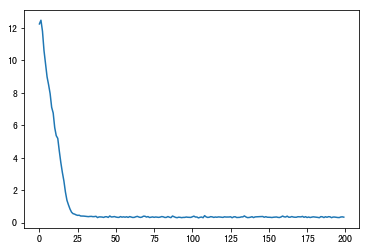

In [4]:
plt.plot(losses)

In [6]:
model

<function __main__.model(x, w, b)>

In [7]:
w

array([[ 0.46087031, -0.35847379]])

In [8]:
b

0.01337461131363381

## Q1: Loss持续下降，意味着什么呢？ 

## 注意！

In [11]:
def test_loss(y, yhat):
    return -np.sum(y*np.log(yhat) + (1 - y)*np.log(1 - yhat))

assuming: [L1, L2, L3, .. LN]

if there is a model, randomly give label:1 randomly give label 0

In [26]:
true_label = np.array([1, 0, 1, 0, 1]) # 二分类
predicate_1 = np.array([0.5, 0.5, 0.5, 0.5, 0.5])

In [27]:
test_loss(true_label, predicate_1)

3.4657359027997265

## 瞎猜的时候的准确度，loss值，我们称为这个模型的Baseline
## 你的值，最起码要比这个好~

## Q2: Loss一直在下降，但是我们现在想知道的是，有多少个label预测对了

In [30]:
true_labels, predicated_labels = [], []

In [31]:
random_test_indices = np.random.choice(range(len(rm)), size=100)

decision_boundary = 0.1  # threshold 阈值

# 警察A: threshold: 0.5, precision: 1.b
# 警察B: threshold: 0.1, precision: 1.
# 警察C: threshold: 0.9, precision: 1.

for i in random_test_indices:
    x1, x2, y = rm[i], lstat[i], target[i]
    predicate = model(np.array([x1, x2]), w, b)  # predicate in (0, 1)
    predicate_label = int(predicate > decision_boundary)

    print('RM: {}, LSTAT: {}, EXPENSIVE: {}, Predicated: {}'.format(x1, x2, y, predicate_label))
    
    true_labels.append(y)
    predicated_labels.append(predicate_label)

RM: 5.85, LSTAT: 8.77, EXPENSIVE: 0, Predicated: 0
RM: 6.345, LSTAT: 4.97, EXPENSIVE: 0, Predicated: 1
RM: 6.389, LSTAT: 9.62, EXPENSIVE: 1, Predicated: 0
RM: 8.398, LSTAT: 5.91, EXPENSIVE: 1, Predicated: 1
RM: 6.273, LSTAT: 6.78, EXPENSIVE: 1, Predicated: 1
RM: 5.926, LSTAT: 13.59, EXPENSIVE: 1, Predicated: 0
RM: 6.728, LSTAT: 4.5, EXPENSIVE: 1, Predicated: 1
RM: 5.731, LSTAT: 13.61, EXPENSIVE: 0, Predicated: 0
RM: 5.404, LSTAT: 13.28, EXPENSIVE: 0, Predicated: 0
RM: 6.03, LSTAT: 7.88, EXPENSIVE: 0, Predicated: 0
RM: 7.52, LSTAT: 7.26, EXPENSIVE: 1, Predicated: 1
RM: 7.489, LSTAT: 1.73, EXPENSIVE: 1, Predicated: 1
RM: 6.031, LSTAT: 7.83, EXPENSIVE: 0, Predicated: 0
RM: 6.121, LSTAT: 8.44, EXPENSIVE: 0, Predicated: 0
RM: 7.82, LSTAT: 3.57, EXPENSIVE: 1, Predicated: 1
RM: 6.458, LSTAT: 12.6, EXPENSIVE: 0, Predicated: 0
RM: 6.426, LSTAT: 7.2, EXPENSIVE: 1, Predicated: 1
RM: 6.487, LSTAT: 5.9, EXPENSIVE: 1, Predicated: 1
RM: 6.317, LSTAT: 13.99, EXPENSIVE: 0, Predicated: 0
RM: 6.212, LSTA

## Accuracy 

In [38]:
def accuracy(ytrues, ylabels):
    return sum(1 for yt, y in zip(ytrues, ylabels) if yt == y) / len(ytrues)

In [39]:
accuracy(true_labels, predicated_labels)

0.86

## 很容易出错~ 

In [41]:
## Assuming 这个场景

假设有一个警察局，100个人里边，判断谁是犯罪分子

事实情况：100个人里边，只有3个是犯罪分子

假如警察A，他就说，这100个人，全部都是犯罪分子，accuracy有多少？

假如警察B，他就说，这100个人，全部都不是犯罪分子，accuracy有多少？

In [47]:
def precision(ytrues, yhats):
    # 预测标签是 1的里边，正确的比例是多少
    # 阳性，positive 检测的对象
    
    positives_pred = [y for y in yhats if y == 1]
    
    return sum(1 for yt, y in zip(ytrues, yhats) if yt == y and y == 1) / len(positives_pred)

In [48]:
precision(true_labels, predicated_labels)

0.875

In [59]:
def recall(ytrues, yhats):
    # 实际是 positive 的里边，有多少比例的被找到了
    
    true_positive = [y for y in ytrues if y == 1] 
    
    return sum(1 for yt, y in zip(ytrues, yhats) if yt == y and yt == 1) / len(true_positive)

In [50]:
recall(true_labels, predicated_labels)

0.7954545454545454

In [51]:
people = [ 0 ] * 90 + [1] * 10

In [52]:
import random

In [53]:
random.shuffle(people)

In [61]:
警察1的结果 = [0] * 100
警察2的结果 = [1] * 100

In [56]:
accuracy(people, 警察1的结果)

0.9

In [57]:
precision(people, 警察1的结果)

ZeroDivisionError: division by zero

In [60]:
recall(people, 警察1的结果)

0.0

In [62]:
accuracy(people, 警察2的结果)

0.1

In [63]:
precision(people, 警察2的结果)

0.1

In [64]:
recall(people, 警察2的结果)

1.0

In [65]:
from sklearn.metrics import confusion_matrix

In [66]:
confusion_matrix(true_labels, predicated_labels)

array([[51,  5],
       [ 9, 35]])

In [68]:
??confusion_matrix

## 回归问题怎么评价

1. accuracy 

$$ acc(y, \hat{y}) = \sum_{i \in N} |y_i - \hat{y_i}| $$
$$ acc(y, \hat{y}) = \sum_{i \in N} |y_i - \hat{y_i}|^2 $$
$$ acc(y, \hat{y}) = \sum_{i \in N} \frac{|y_i - \hat{y_i}|}{|y_i|} $$

#### R2:  第一种情况：如何所有的yi和yhat-i的值都相等
#### R2：第二种情况：如果所有的yhat-i是yi的平均值呢？
#### R2：第三种情况：如果R2的值 比0还小，那么意味着什么呢？

## Model: 在训练数据的时候，效果很好：loss很小，precision 很高，accuracy（当且仅当数据label比较均衡的时候，才有必要使用acc）也比较好，但是在实际情况下，用到没有见过的数据的时候，效果就很差了~  ==》 过拟合！

## Outlinear 异常值

### 常见的一种方法是用百分位来解决数值型问题

In [ ]:
random_numbers = [0.9, 0.1, .... ]

In [71]:
import numpy as np

In [81]:
np.where(np.array(lstat) < np.percentile(np.array(lstat), 0.25) / 1.5)

(array([], dtype=int64),)

In [84]:
np.where(np.array(lstat) > np.percentile(np.array(lstat), 0.75) * 2.5)

(array([  1,   6,   7,   8,   9,  10,  11,  12,  13,  14,  15,  17,  18,
         19,  20,  21,  22,  23,  24,  25,  26,  27,  28,  29,  30,  31,
         32,  33,  34,  35,  36,  37,  38,  43,  44,  45,  46,  47,  48,
         49,  50,  51,  53,  54,  59,  60,  61,  63,  64,  66,  67,  68,
         69,  71,  73,  75,  76,  77,  78,  79,  81,  83,  84,  86,  87,
         90,  91,  92,  94,  96, 100, 101, 102, 103, 104, 105, 106, 107,
        108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120,
        121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133,
        134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146,
        147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 159, 164, 165,
        167, 168, 169, 170, 171, 172, 173, 174, 176, 180, 181, 184, 185,
        197, 201, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,
        216, 217, 218, 219, 220, 221, 222, 223, 230, 234, 235, 236, 239,
        240, 241, 242, 244, 245, 246, 247, 248, 255